                                                         Titanic Survival Analysis

objective 

In [56]:
# import all nessasory libraries

import numpy as np 
import pandas as  pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# loading data from csv
df = pd.read_csv(r"titanic.csv")

In [3]:
# featching top rows
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# fetching structure of dataset(cols,rows)
df.shape

(891, 12)

Dataset Description

Data Cleaning & Preprocessing

In [5]:
# check information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check Null Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# featching all unique age's
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [8]:
# replace null values with average age
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [9]:
# convert datatype from float to int
df["Age"]=df["Age"].astype(int)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [12]:
df["Age"].unique()

array([22, 38, 26, 35, 29, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [13]:
# featching all unique values in "Cabin" column
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [14]:
# dropp column 'Cabin' as it is not usefull for analysis 
df.drop("Cabin",axis=1,inplace =True)

In [15]:
df["Embarked"].unique()           #column "Embarked" has null values

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
# drop all null values
df.dropna(inplace=True)

In [17]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C


In [18]:
# drop unnessasory columns
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [19]:
df.head(2)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C


In [20]:
# creating column "Family" 
df["Family"] = df["SibSp"] + df["Parch"]

In [21]:
df.head(2)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22,1,0,7.2500,S,1
1,1,1,female,38,1,0,71.2833,C,1


In [22]:
# drop columns "SibSp", "Parch" 
df.drop(["SibSp","Parch"],axis=1 , inplace=True)

In [23]:
# Final DataFrame

In [24]:
df.head(2)

,Survived,Pclass,Gender,Age,Fare,Embarked,Family
0,0,3,male,22,7.2500,S,1
1,1,1,female,38,71.2833,C,1


In [25]:
df.shape 

(889, 7)

In [26]:
df.isnull().sum()    

Survived    0
Pclass      0
Gender      0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Gender    889 non-null    object 
 3   Age       889 non-null    int64  
 4   Fare      889 non-null    float64
 5   Embarked  889 non-null    object 
 6   Family    889 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


Data Analysis

1 - What is the average age of passengers on the Titanic?

In [28]:
avg_age=df["Age"].mean()
print(avg_age)

29.498312710911136


2 -  How does the average age differ across different passenger classes (Pclass)?

In [29]:
print(df["Pclass"].mean())

2.3115860517435323


In [30]:
df["Pclass"].unique()

array([3, 1, 2])

In [31]:
Average_AGE_PCLASS = df.groupby("Pclass")["Age"].mean()
Average_AGE_PCLASS

Pclass
1    36.822430
2    29.804348
3    26.191446
Name: Age, dtype: float64

3 -  Calculate the total number of passengers

In [32]:
Total_Count = df["Gender"].count()
print(Total_Count )

889


In [33]:
gender_count = df["Gender"].value_counts()
gender_count

Gender
male      577
female    312
Name: count, dtype: int64

4 - Calculate the percentage of each gender

In [34]:
percentage = (gender_count / Total_Count ) * 100

In [35]:
percentage

Gender
male      64.904387
female    35.095613
Name: count, dtype: float64

5 -  Calculate total passengers and total survivors

In [36]:
df.columns

Index(['Survived', 'Pclass', 'Gender', 'Age', 'Fare', 'Embarked', 'Family'], dtype='object')

In [37]:
print(df["Survived"].count())

889


In [38]:
print(df["Survived"].unique())

[0 1]


In [39]:
print(df["Survived"].sum())

340


6 - Calculate survival rate

In [40]:
a = df["Survived"].count()
b = df["Survived"].sum()
survival_rate = (b / a ) * 100
print(f"survival_rate: {survival_rate: .2f}")

survival_rate:  38.25


Data Visualization 

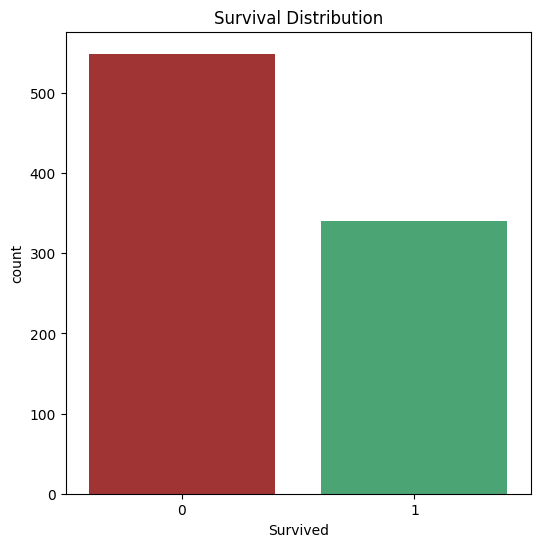

In [41]:
plt.figure(figsize=(6,6))
sns.countplot(data = df , x ="Survived",palette =['FireBrick', 'MediumSeaGreen'])
plt.title('Survival Distribution')
plt.show()

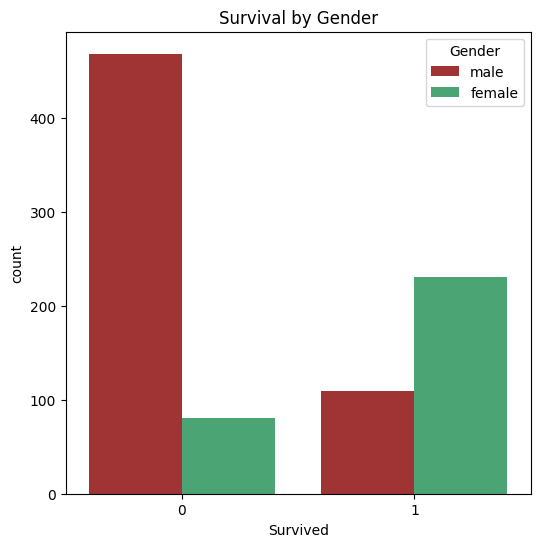

In [42]:
plt.figure(figsize=(6,6))
sns.countplot(data = df , x ="Survived",hue="Gender" , palette=['FireBrick', 'MediumSeaGreen'] )
plt.title('Survival by Gender')
plt.show()

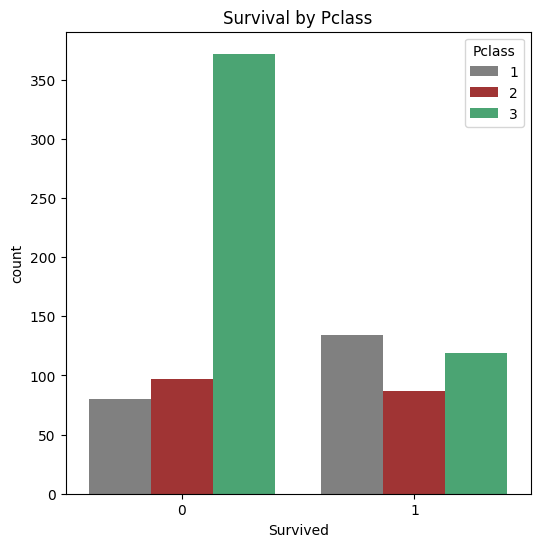

In [43]:
plt.figure(figsize=(6,6))
sns.countplot(data = df , x ="Survived",hue="Pclass",palette=['grey','FireBrick', 'MediumSeaGreen'])
plt.title('Survival by Pclass')
plt.show()

# Age Distribution 

In [44]:
df["Age"].unique()

array([22, 38, 26, 35, 29, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [45]:
df["Age"].value_counts()

Age
29    197
24     31
22     27
28     27
30     27
     ... 
66      1
12      1
53      1
80      1
74      1
Name: count, Length: 71, dtype: int64

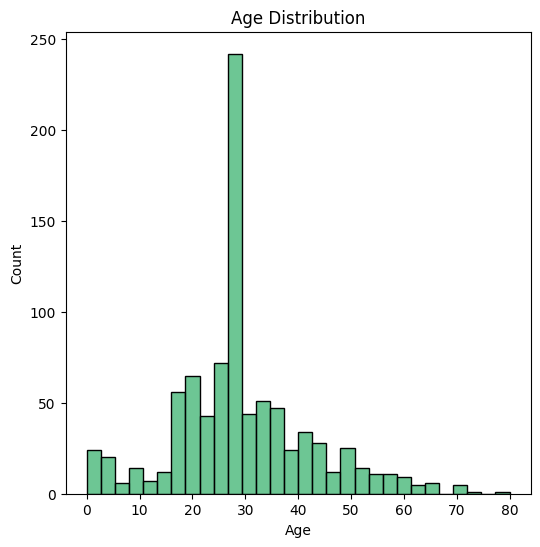

In [46]:
plt.figure(figsize=(6,6))
sns.histplot(df["Age"],color='MediumSeaGreen')
plt.title('Age Distribution')
plt.show()

In [47]:
df.columns

Index(['Survived', 'Pclass', 'Gender', 'Age', 'Fare', 'Embarked', 'Family'], dtype='object')

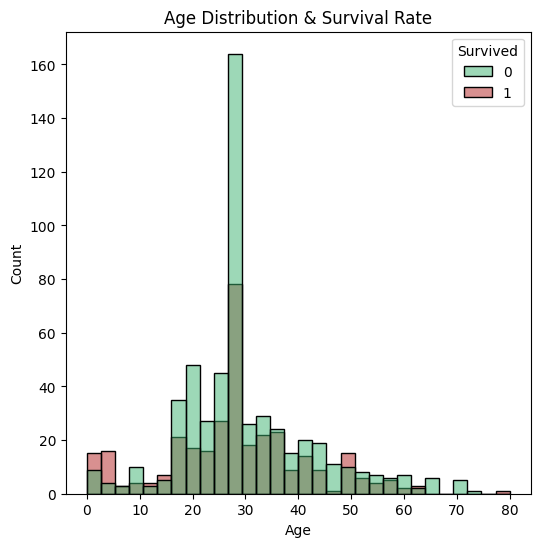

In [48]:
plt.figure(figsize=(6,6))
sns.histplot(data = df , x ="Age" , hue ="Survived" ,palette={0: "MediumSeaGreen", 1: "FireBrick"})
plt.title('Age Distribution & Survival Rate')
plt.show()

# Fare Distribution 

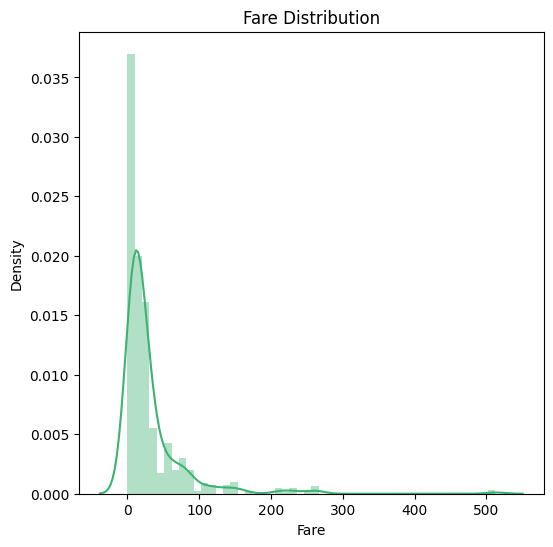

In [49]:
plt.figure(figsize=(6,6))
sns.distplot(df["Fare"],color="MediumSeaGreen")
plt.title('Fare Distribution')
plt.show()

# Survival Analysis Based on Family

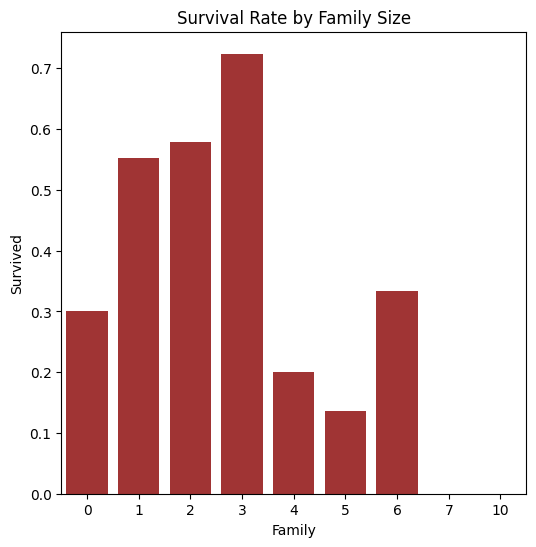

In [50]:
plt.figure(figsize=(6,6))
sns.barplot(x = "Family",y ="Survived",data= df,ci = None, color="FireBrick")
plt.title('Survival Rate by Family Size')
plt.show()

In [51]:
Sur_rate = df.groupby("Family")["Survived"].mean()

In [52]:
Sur_rate 

Family
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

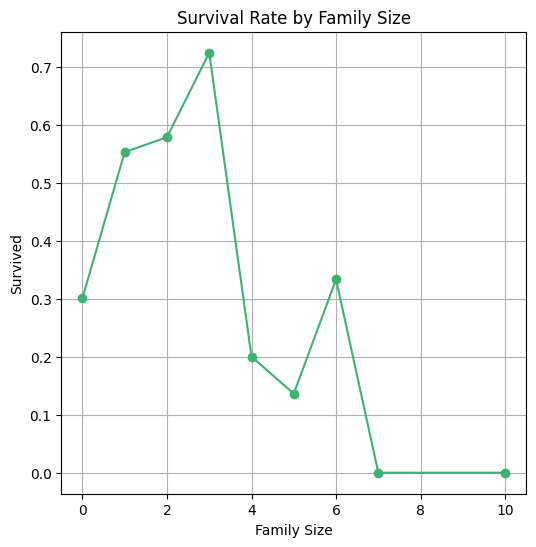

In [55]:
plt.figure(figsize=(6,6))
plt.plot(Sur_rate.index,Sur_rate.values,marker="o",color="MediumSeaGreen")
plt.title('Survival Rate by Family Size')
plt.xlabel("Family Size")
plt.ylabel("Survived")
plt.grid()
plt.show()